# Data insight

In [1]:
from app.utils import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset, labels = load_dataset("../dataset/train")

label_to_category = {}
with open("../dataset/labels.txt", "r") as f:
    for line in f.readlines():
        if line != "\n":
            label, category = line.split(":")
            label_to_category[int(label)] = category.strip(" \n")

info = []
for img, label in zip(dataset, labels):
    info.append([label, label_to_category[label], img.shape[0], img.shape[1]])
    
df = pd.DataFrame(info, columns=["label", "category", "width", "height"])
df


,label,category,width,height
0,46,ciseaux,265,255
1,16,arbre,253,274
2,30,marteau,207,115
3,49,chaton,337,266
4,42,glaçon,330,317
...,...,...,...,...
280,19,lune,282,201
281,35,flocon,184,172
282,40,coccinelle,242,256
283,54,biberon,287,149


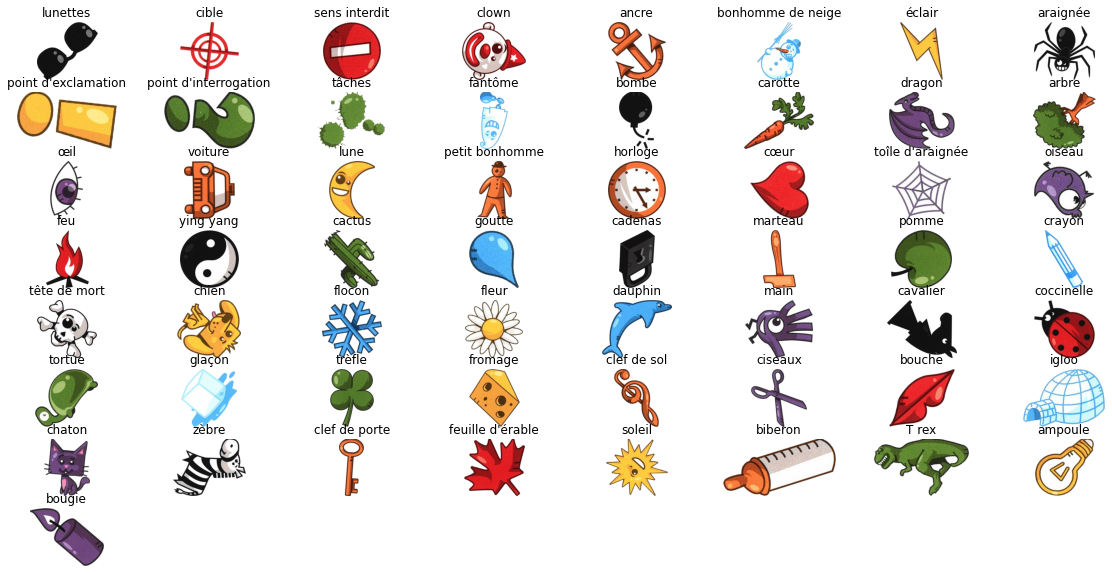

In [3]:
# Different colors + rotation are performed
plt.figure(figsize=(20,10))

for i in range(1, len(label_to_category) + 1):
    plt.subplot(8, 8, i)
    plt.title(label_to_category[i])
    idx = np.where(np.array(labels) == i)[0][0]
    plt.imshow(dataset[idx])
    plt.axis('off')

plt.show()

In [4]:
# Few samples per class => need for data augmentation
df.groupby("category").count()["label"]

category
T rex                    5
ampoule                  5
ancre                    5
araignée                 5
arbre                    5
biberon                  5
bombe                    5
bonhomme de neige        5
bouche                   5
bougie                   5
cactus                   5
cadenas                  5
carotte                  5
cavalier                 5
chaton                   5
chien                    5
cible                    5
ciseaux                  5
clef de porte            5
clef de sol              5
clown                    5
coccinelle               5
crayon                   5
cœur                     5
dauphin                  5
dragon                   5
fantôme                  5
feu                      5
feuille d'érable         5
fleur                    5
flocon                   5
fromage                  5
glaçon                   5
goutte                   5
horloge                  5
igloo                    5
lune               

In [5]:
# Different shape => may need to reshape all of it ? 
df.describe()

,label,width,height
count,285.000000,285.000000,285.000000
mean,29.000000,199.691228,194.575439
std,16.480889,59.894944,56.456877
min,1.000000,71.000000,80.000000
25%,15.000000,157.000000,155.000000
50%,29.000000,195.000000,192.000000
75%,43.000000,236.000000,225.000000
max,57.000000,398.000000,418.000000


In [6]:
dataset_aug, labels_aug = dataset_augmentation([dataset[42]], [labels[42]], transformation_per_image=1)

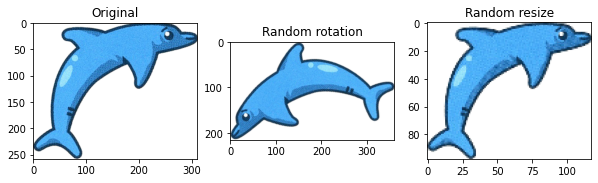

In [7]:
# Different colors + rotation are performed
plt.figure(figsize=(10,10))

plt.subplot(1, 3, 1)
plt.imshow(dataset_aug[0])
plt.title("Original")
plt.subplot(1, 3, 2)
plt.title("Random rotation")
plt.imshow(dataset_aug[1])
plt.subplot(1, 3, 3)
plt.title("Random resize")
plt.imshow(dataset_aug[2])

plt.show()

# TODO: train_test_split()